In [134]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
from pycaret import nlp
from pycaret import classification
mpl.rcParams['figure.dpi'] = 300

data = pd.read_csv('bbc-text.csv')

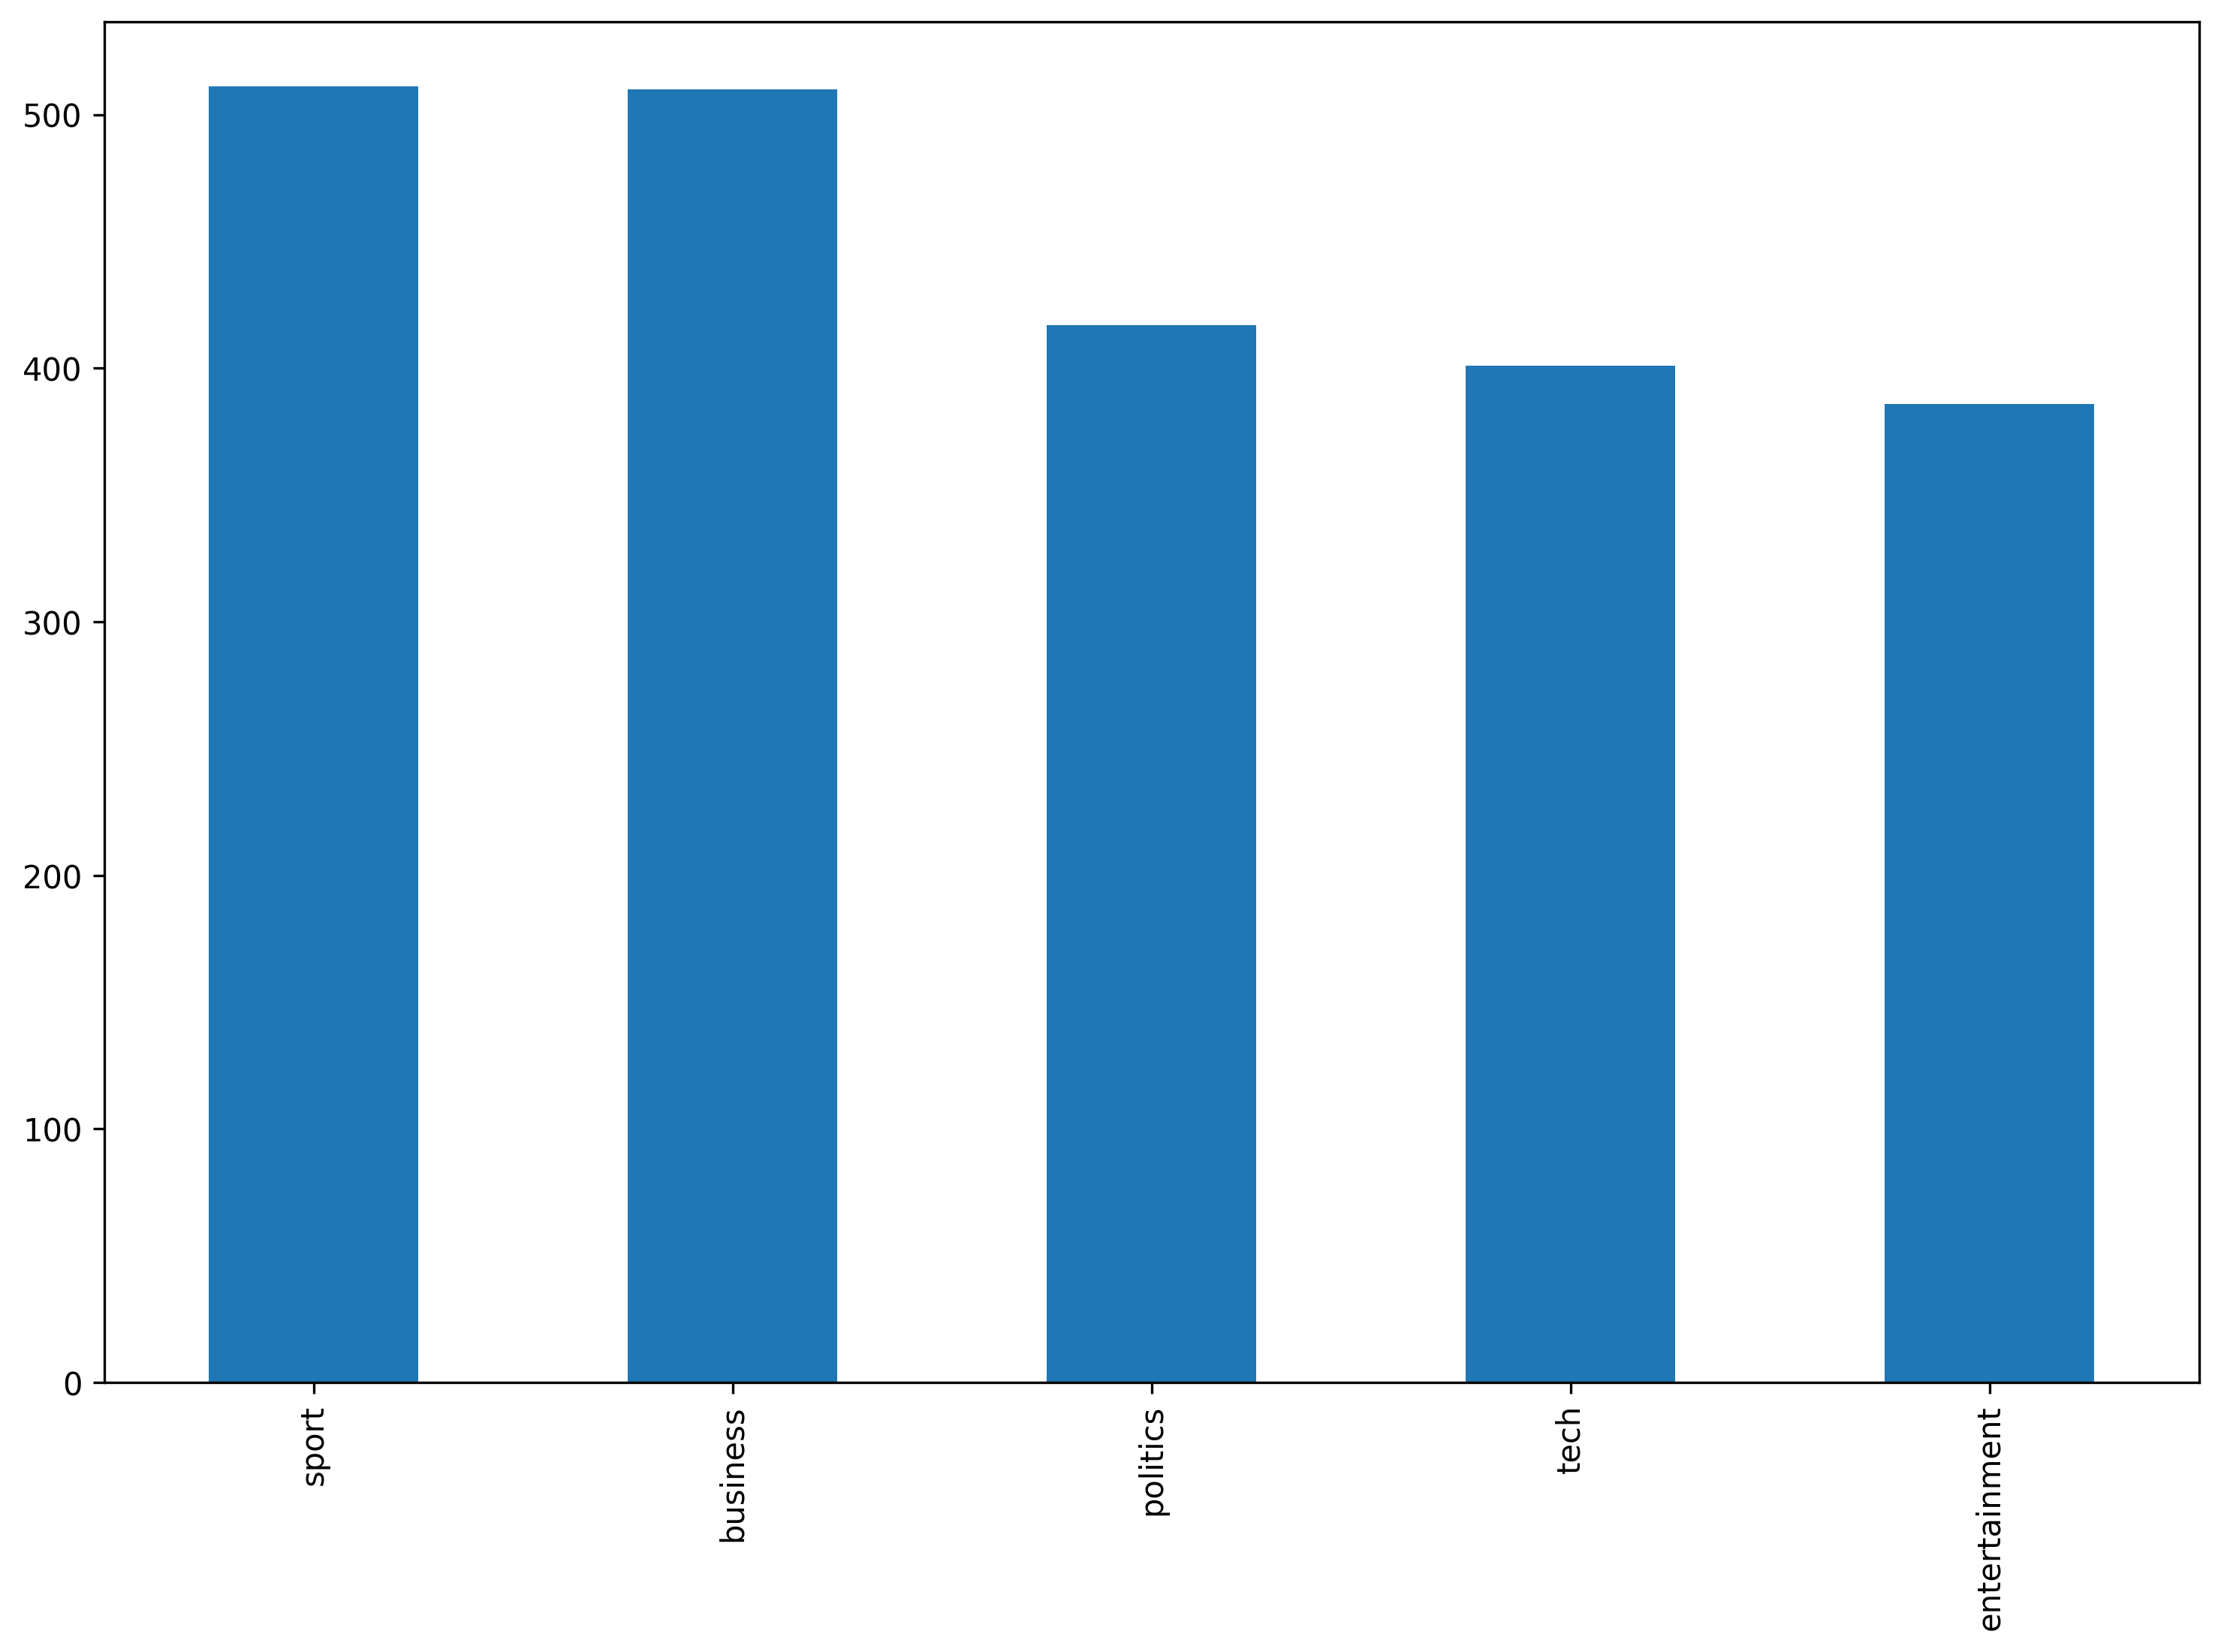

In [62]:
cat_count = data['category'].value_counts()

categories.plot(kind = 'bar', figsize = (12,8))

plt.show()

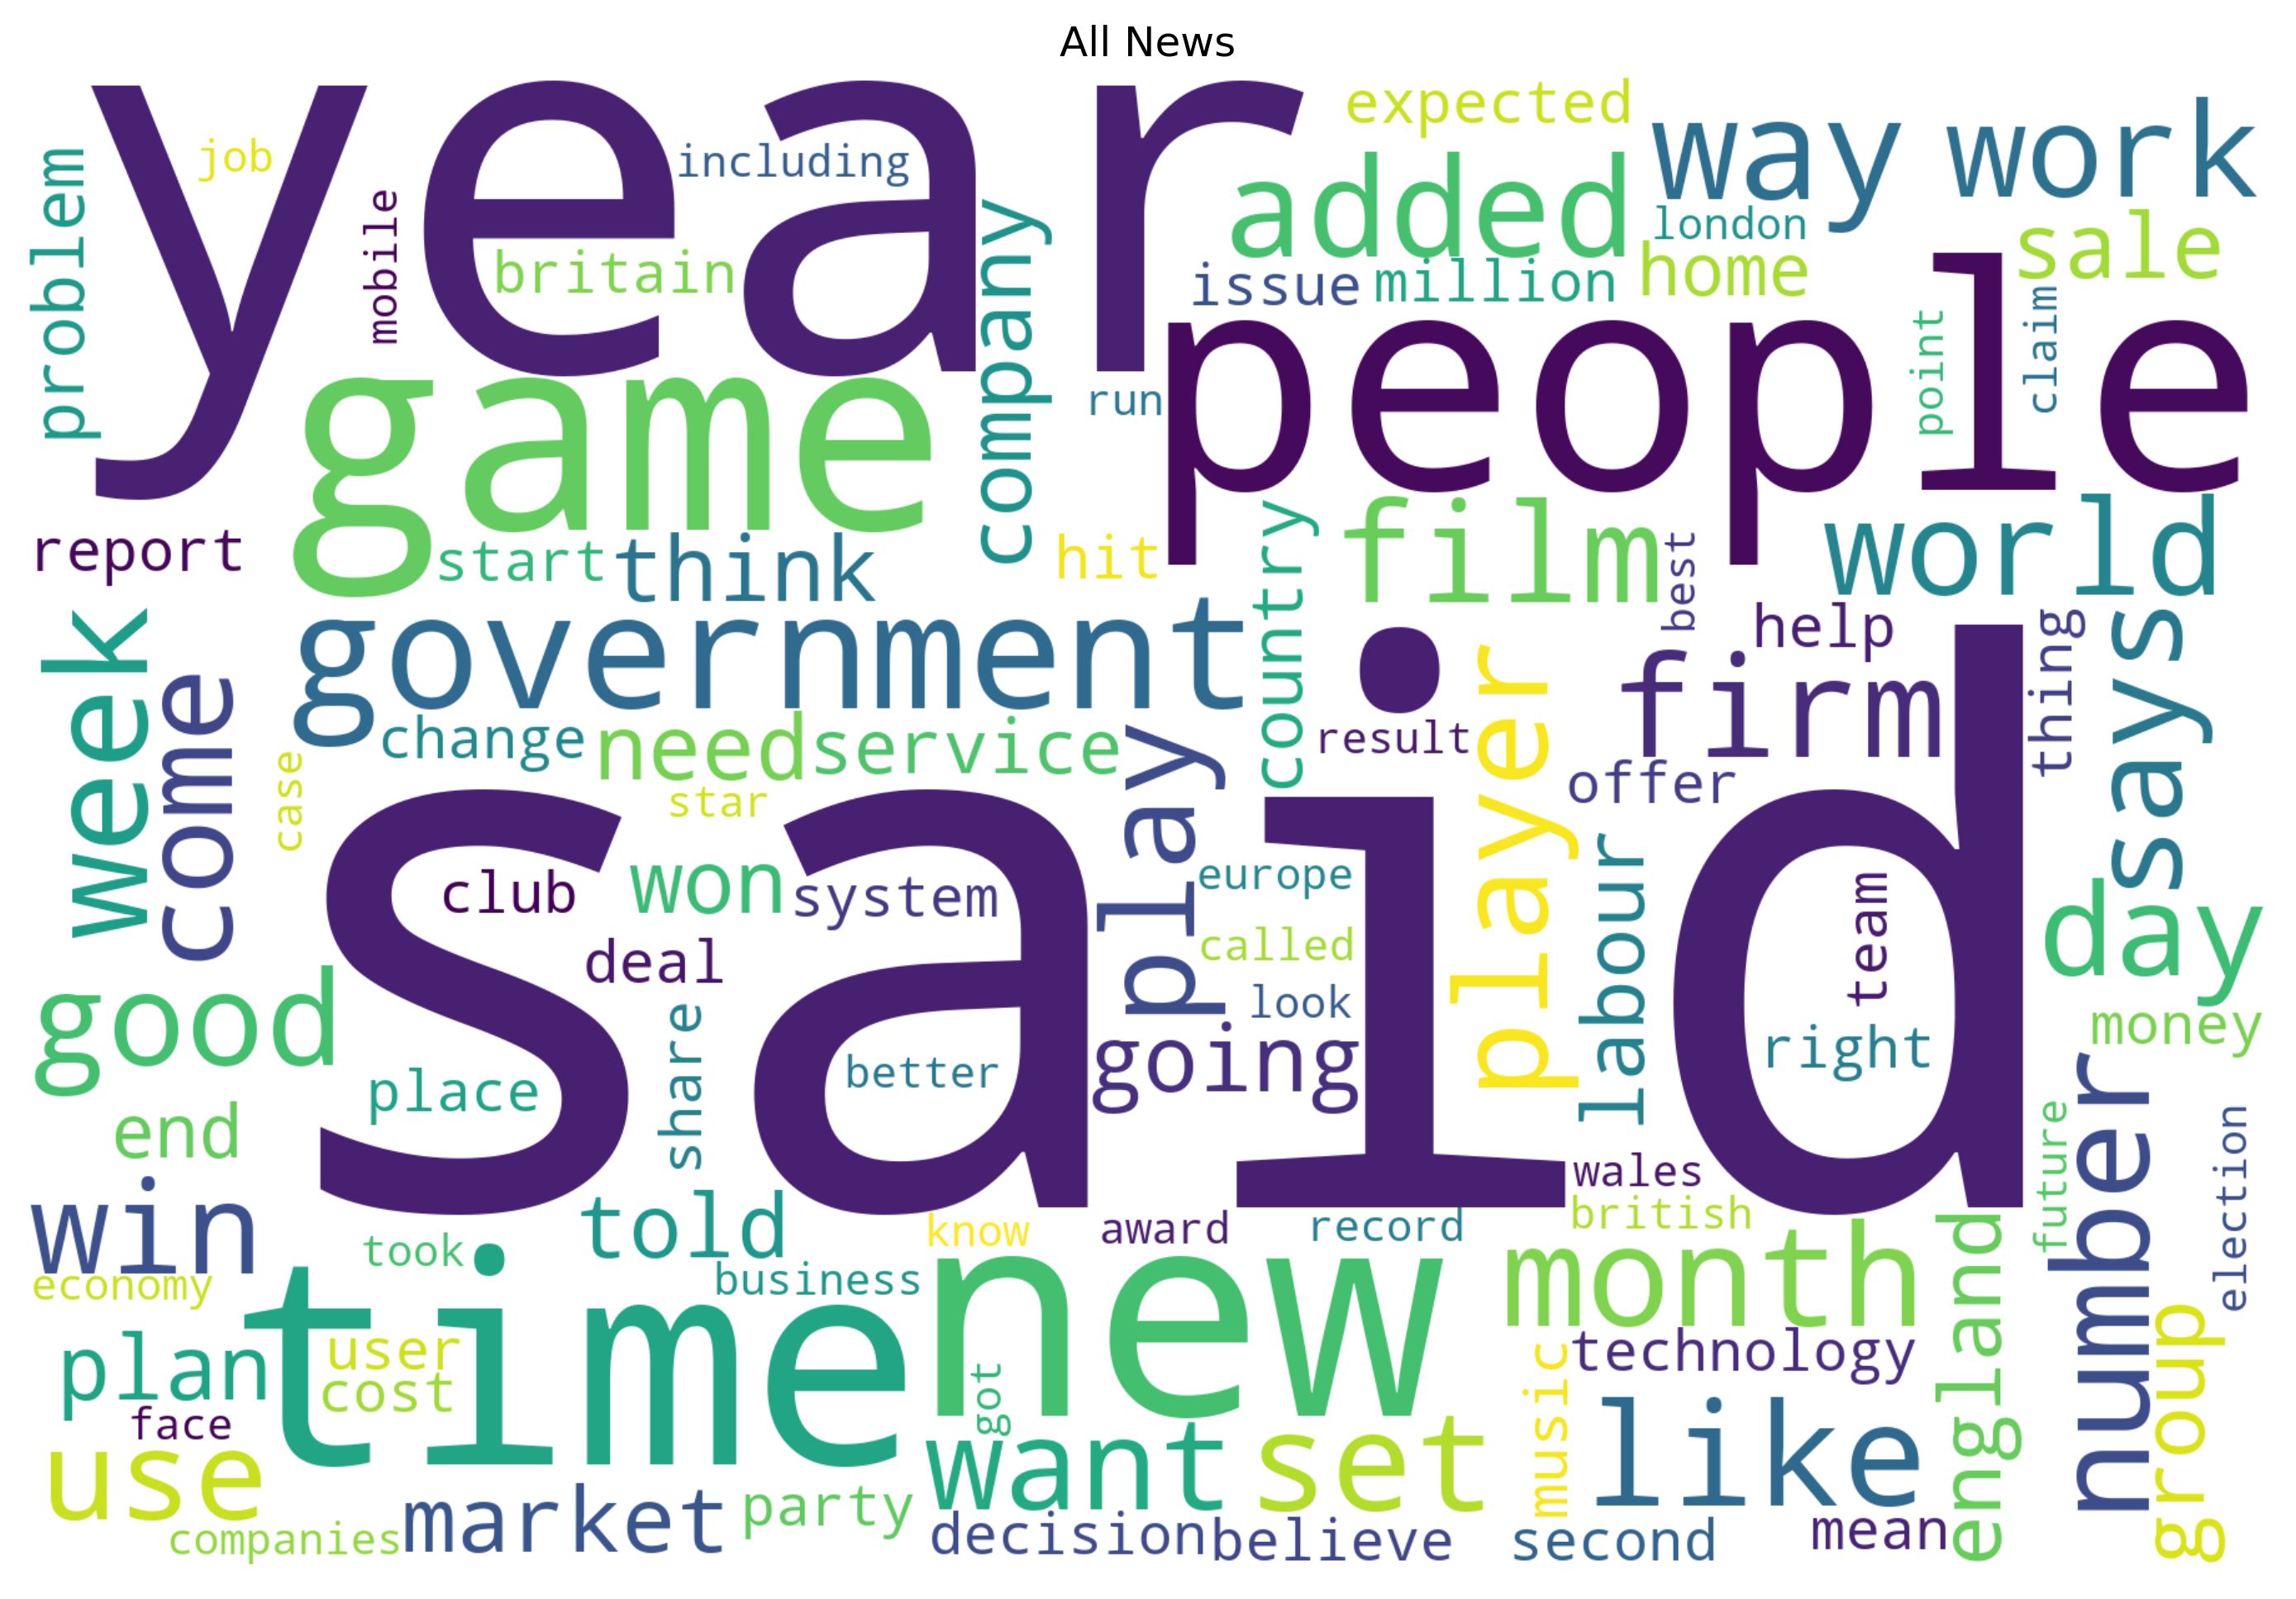

In [238]:
wc = WordCloud(width = 1800, height = 1200,
               random_state = 42, background_color = 'white',
               min_word_length = 3, max_words = 100,
               stopwords = STOP_WORDS)

text = ' '.join(data['text'].to_list())

wc_img = wc.generate(text)
#wc.to_file("blah.png")

plt.figure(figsize = (12,8))
plt.imshow(wc_img, interpolation = 'bilinear')
plt.title("All News")
plt.axis("off")

plt.show()

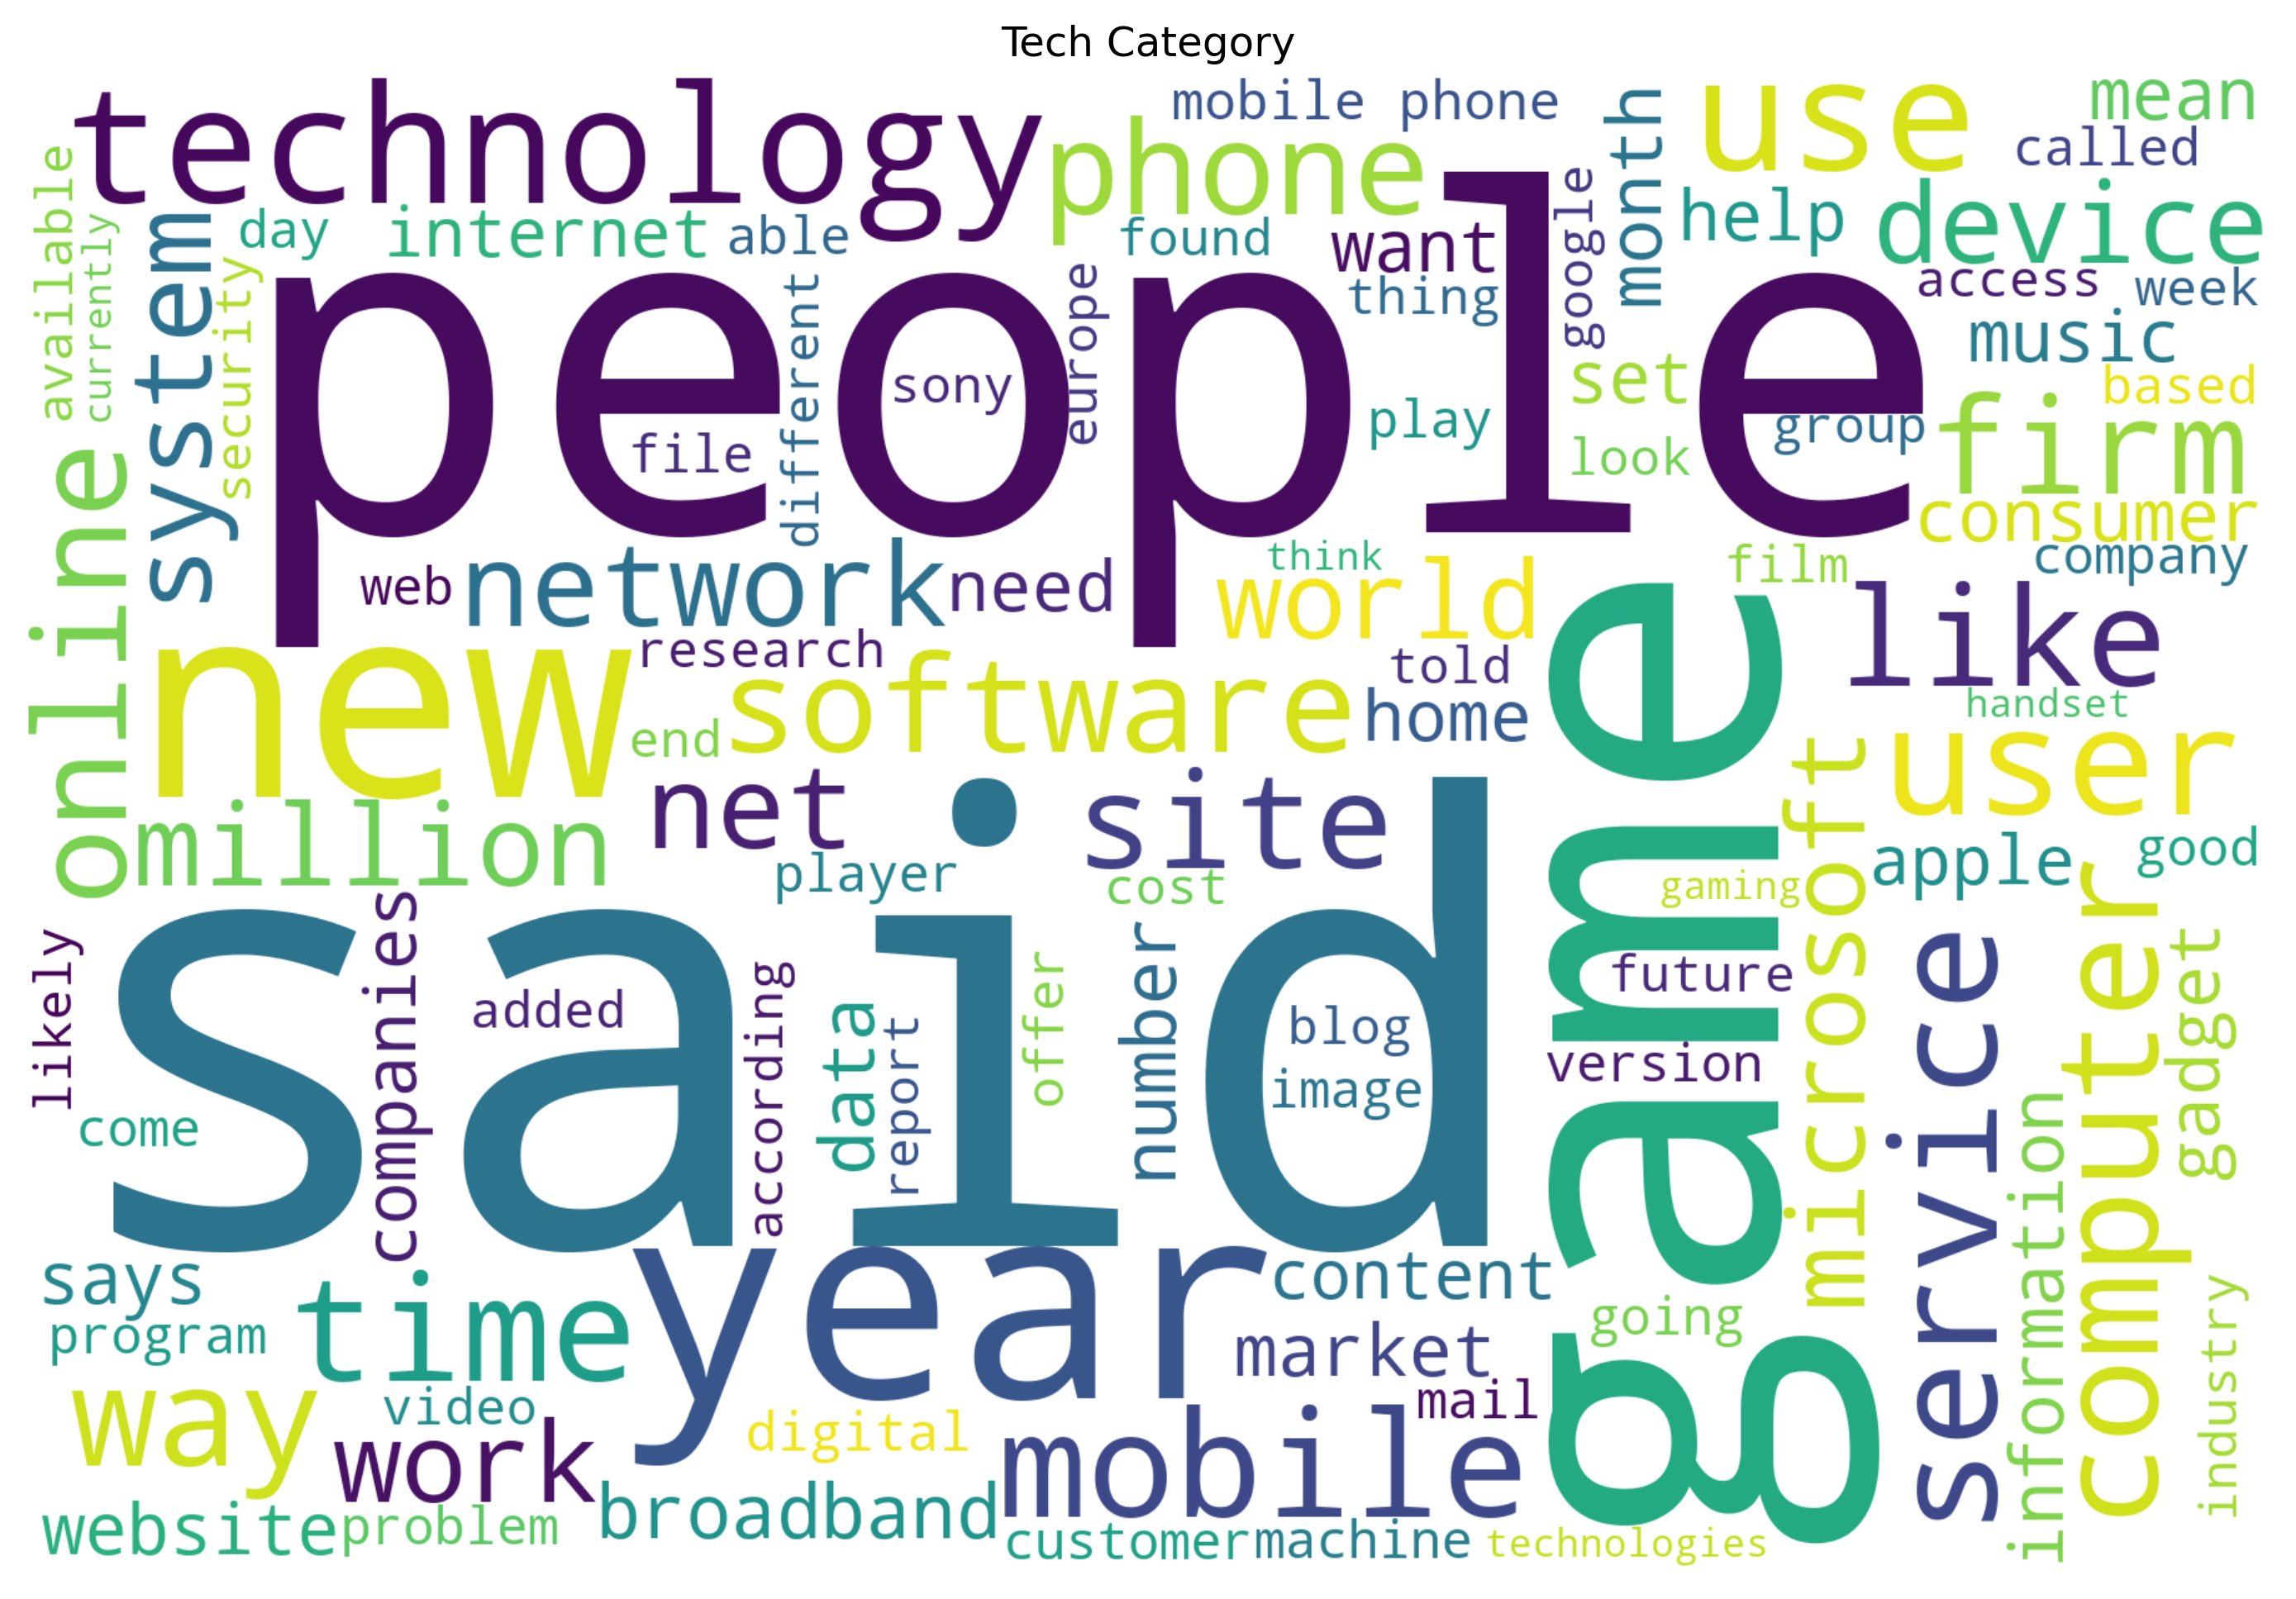

In [149]:
data_tech = data.query(" category == 'tech' ")['text']
text_tech = ' '.join(data_tech.to_list())

wc_img = wc.generate(text_tech)

plt.figure(figsize = (12,8))
plt.imshow(wc_img, interpolation = 'bilinear')
plt.title("Tech Category")
plt.axis("off")

plt.show()

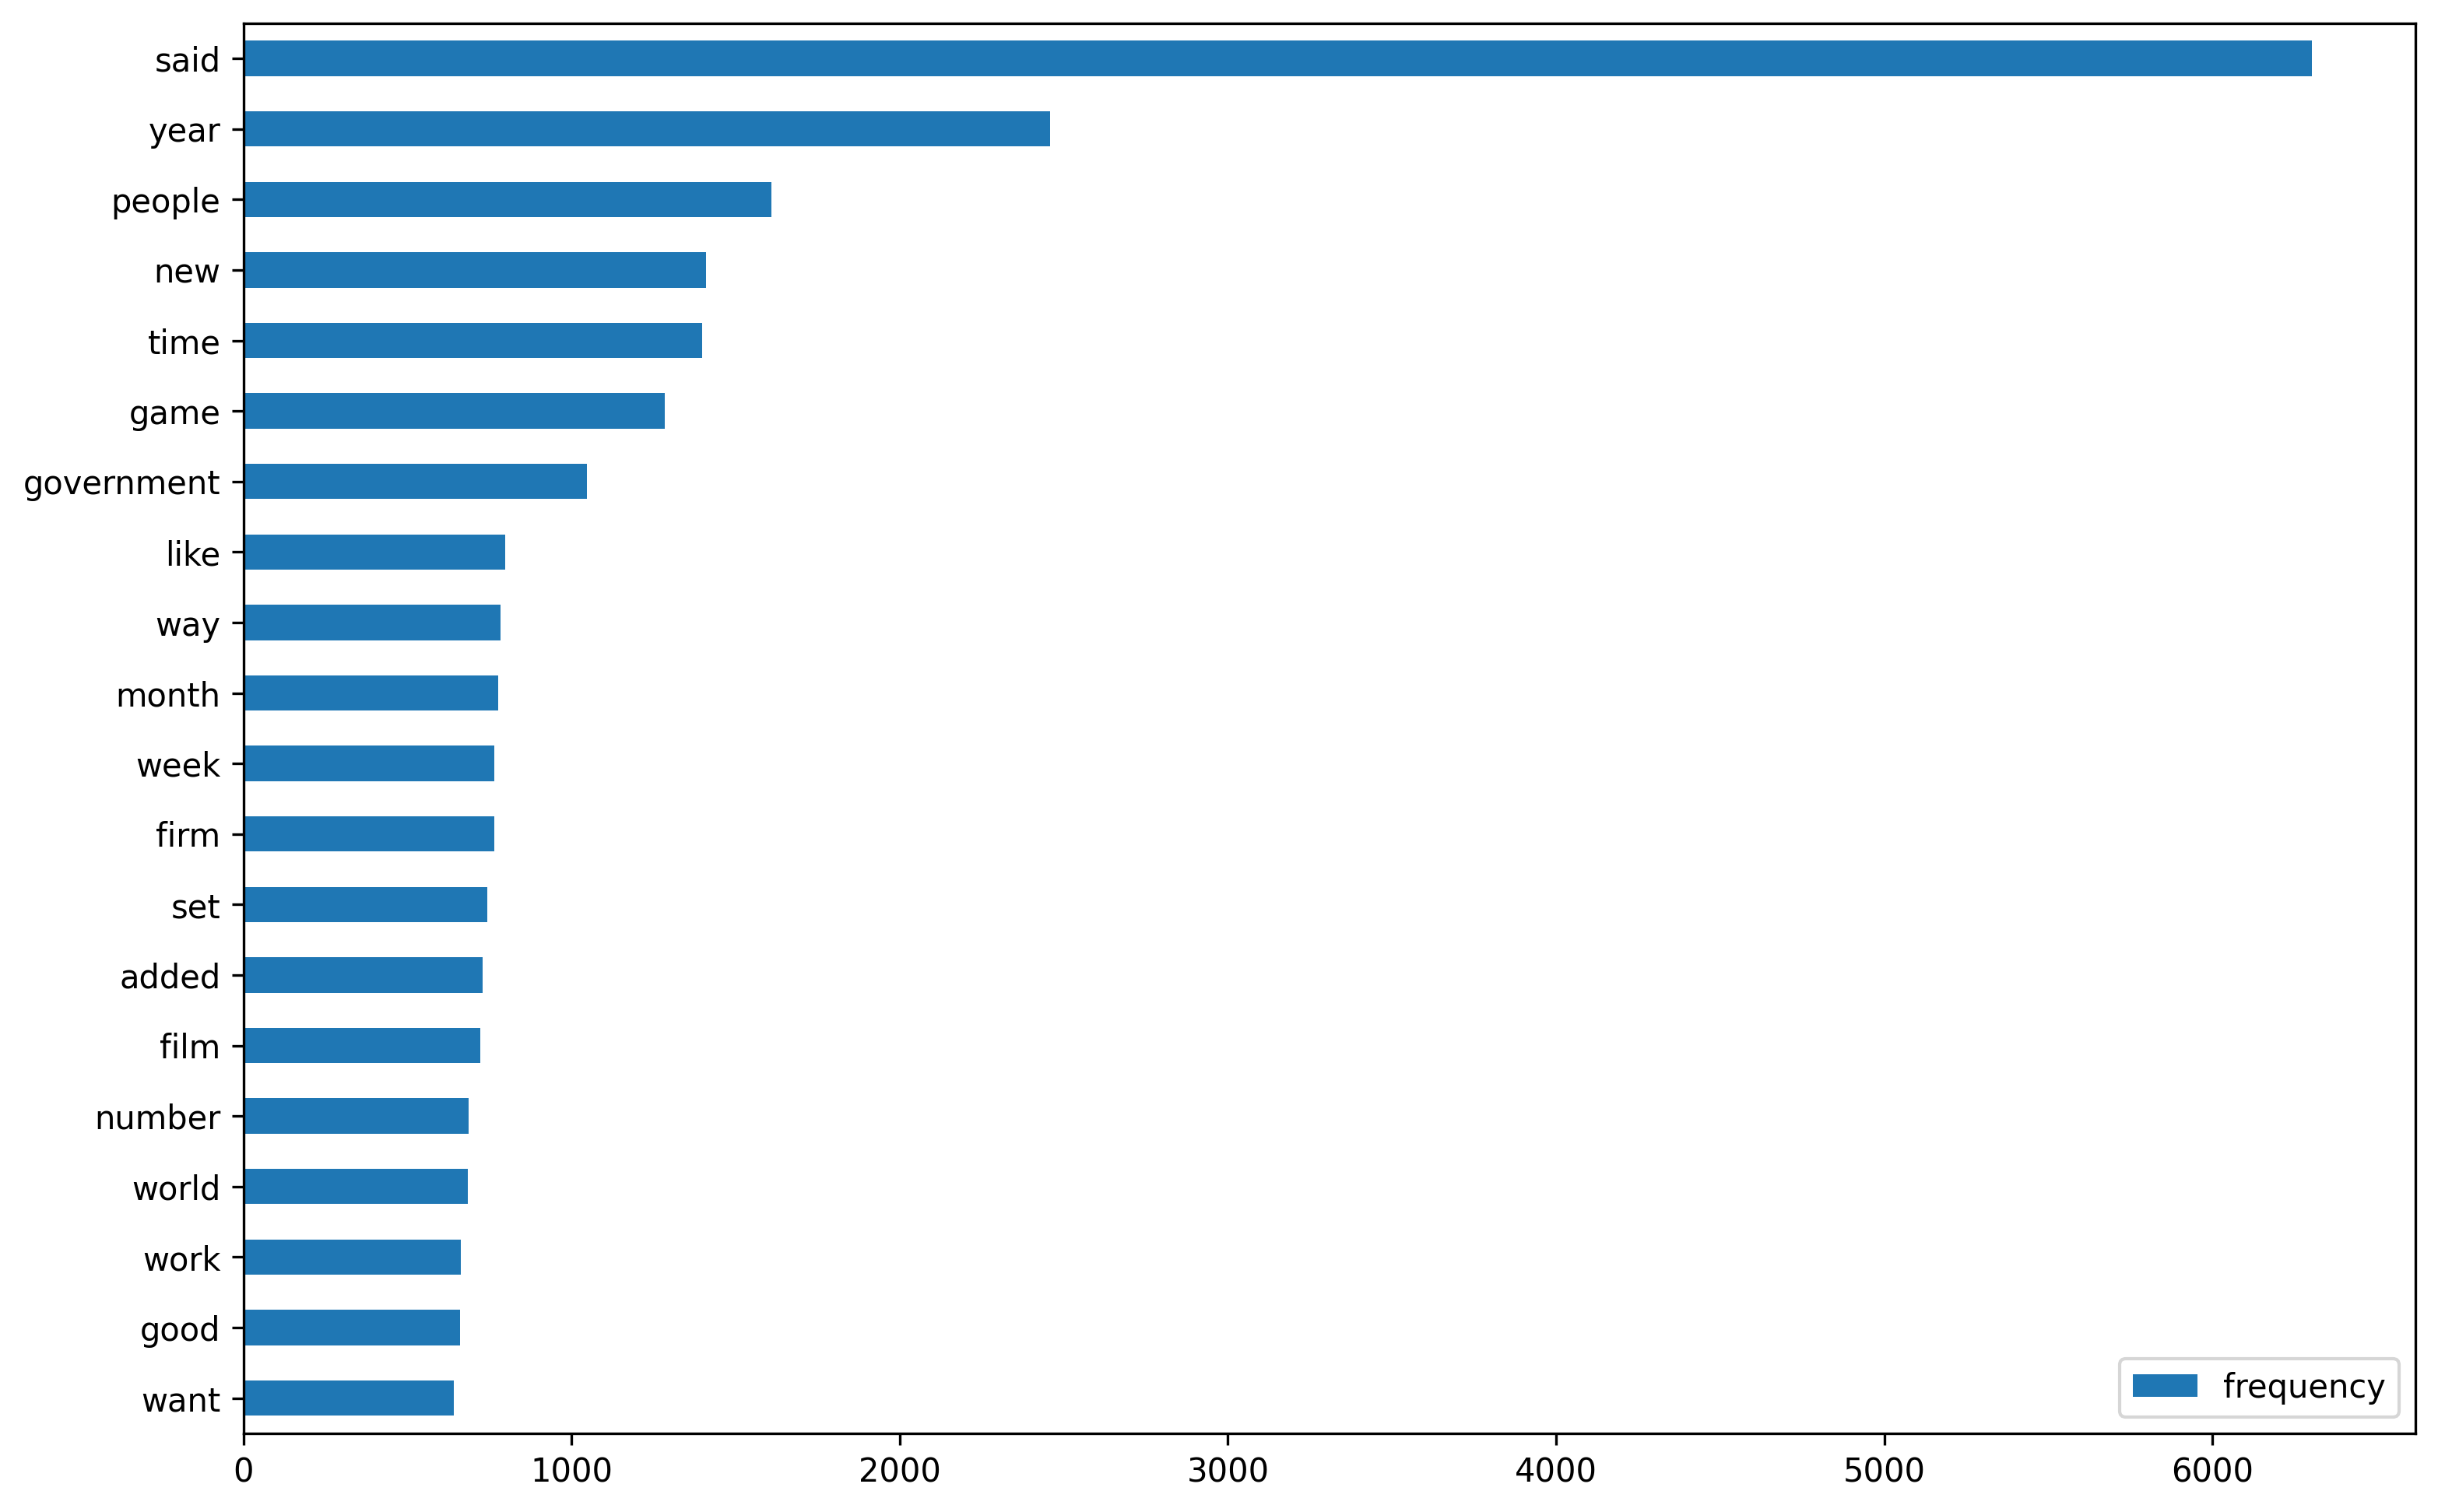

In [ ]:
freq = wc.process_text(text)
df_freq = pd.DataFrame.from_dict(freq, orient='index', columns=['frequency'])

df_freq.sort_values('frequency')[-20:].plot(kind = 'barh', figsize = (12,8))

plt.show()

In [227]:
nlp_ = nlp.setup(data = data, target='text', session_id = 6842)

Description,Value
session_id,6842
Documents,2225
Vocab Size,15625
Custom Stopwords,False


In [11]:
lda = nlp.create_model('lda', num_topics = 6)

In [12]:
data_assigned = nlp.assign_model(lda)

In [20]:
cols = ['Topic_0', 'Topic_1', 'Topic_2',
        'Topic_3', 'Topic_4', 'Topic_5',
        'category']

data_assigned_ = data_assigned[cols]

data_assigned_

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,category
0,0.000532,0.799589,0.000363,0.042981,0.068994,0.087541,tech
1,0.001329,0.031523,0.000910,0.333612,0.207997,0.424630,business
2,0.043839,0.002879,0.053541,0.003083,0.682899,0.213759,sport
3,0.033124,0.003366,0.001390,0.003702,0.845656,0.112761,sport
4,0.769706,0.003300,0.001276,0.003521,0.122637,0.099559,entertainment
...,...,...,...,...,...,...,...
2220,0.013837,0.037623,0.018374,0.895452,0.003413,0.031300,business
2221,0.002379,0.003962,0.001630,0.075179,0.006447,0.910403,politics
2222,0.556922,0.076590,0.000980,0.112078,0.089847,0.163584,entertainment
2223,0.024502,0.059840,0.003895,0.022876,0.071830,0.817056,politics


In [21]:
classf = classification.setup(data_assigned_, target = 'category',
                              session_id = 3100, fix_imbalance = True,
                              train_size = 0.8)

,Description,Value
0,session_id,3100
1,Target,category
2,Target Type,Multiclass
3,Label Encoded,"business: 0, entertainment: 1, politics: 2, sport: 3, tech: 4"
4,Original Data,"(2225, 7)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [22]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9517,0.9959,0.9515,0.9528,0.9516,0.9394,0.9397,2.8430
lightgbm,Light Gradient Boosting Machine,0.9500,0.9958,0.9496,0.9514,0.9499,0.9373,0.9377,0.2390
rf,Random Forest Classifier,0.9489,0.9947,0.9483,0.9502,0.9488,0.9359,0.9362,0.1170
et,Extra Trees Classifier,0.9483,0.9954,0.9479,0.9494,0.9483,0.9352,0.9354,0.1040
xgboost,Extreme Gradient Boosting,0.9478,0.9954,0.9479,0.9492,0.9477,0.9345,0.9349,0.2180
gbc,Gradient Boosting Classifier,0.9455,0.9955,0.9453,0.9471,0.9454,0.9317,0.9321,0.2450
knn,K Neighbors Classifier,0.9438,0.9851,0.9427,0.9459,0.9441,0.9295,0.9299,0.0310
svm,SVM - Linear Kernel,0.9376,0.0000,0.9358,0.9402,0.9378,0.9217,0.9223,0.0180
lr,Logistic Regression,0.9337,0.9956,0.9321,0.9364,0.9339,0.9168,0.9174,0.0120
nb,Naive Bayes,0.9315,0.9903,0.9315,0.9341,0.9315,0.9141,0.9147,0.0070
